# Lab 5: Introduction to Integration

**GOALS:**
- Summation
- Integration
- Applications of Integration

Reminder: Run all cells each time you open the notebook to work on it.  If you don't run all at least make sure you run the one below with the libraries and functions we need. 
# MAKE SURE THE CELL BELOW HAS RUN WHEN YOU REOPEN EACH TIME!

In [4]:
#Make sure this cell has run
#Importing some libraries and functions we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.misc import derivative
import math
from sympy import solve
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


Example to start: 

May you worked a summer job before coming to HPU; maybe you did not. For the sake of this, pretend you did. 
You got paid 100 dollars each week.  You have saving up for something, so you did not spend any of it, instead you saved it stored in your desk and let it build up. 
How much would you have after 10 weeks?

In [5]:
p=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]



In [6]:
print(p)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


What operation could you do to figure out how much you had?

Can we get the computer to do that for us?

In [7]:
sum(p)

1000

What would this look like on a graph?  

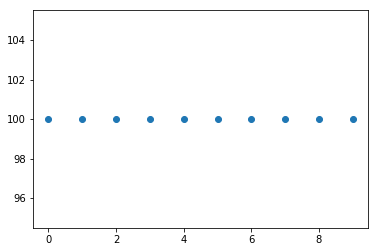

In [8]:
plt.plot(p, 'o')

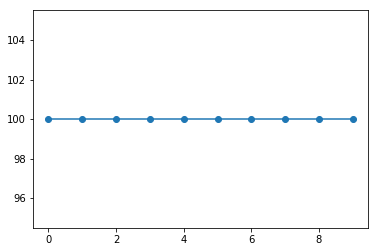

In [9]:
plt.plot(p, '-o')

What is the 1000 also equal to as related to the graph?

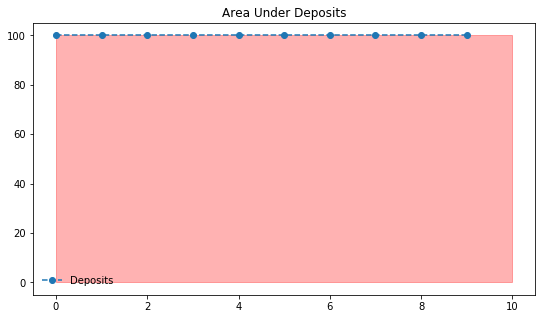

In [10]:
x=[0,1,2,3,4,5,6,7,8,9,10]
y=100
plt.figure(figsize = (9, 5))
plt.plot(p, '--o', label = 'Deposits')
plt.title("Area Under Deposits")
plt.fill_between(x,y, alpha = 0.3, color = 'red')
plt.legend(loc = 'best', frameon = False)

What if it wasn't the same amount each week?


Text(0, 0.5, 'Deposit in Dollars')

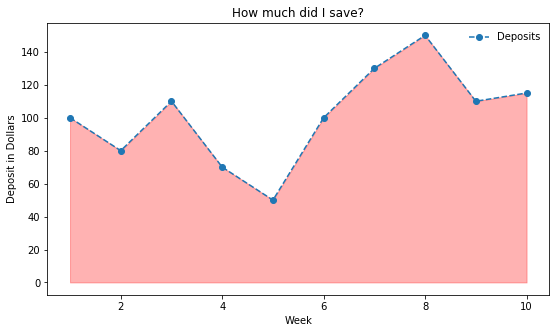

In [56]:
x=[1,2,3,4,5,6,7,8,9,10]
y=[100,80,110,70,50,100, 130, 150, 110, 115]
plt.figure(figsize = (9, 5))

plt.plot(x,y, '--o', label = 'Deposits')
plt.title("How much did I save?")
plt.fill_between(x,y, alpha = 0.3, color = 'red')
plt.legend(loc = 'best', frameon = False)
plt.xlabel("Week")
plt.ylabel("Deposit in Dollars")

In [57]:
sum(y)

1015

In [58]:
a, b, c, d, e, h, j=np.polyfit(x,y,6)

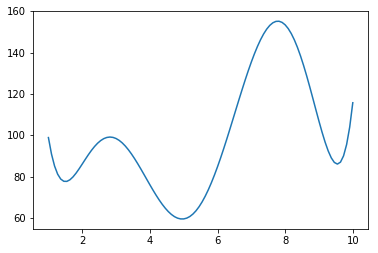

In [59]:
def s(x): return a*x**6+b*x**5+c*x**4+d*x**3+e*x**2+h*x+j
x=np.linspace(1,10,100)
plt.plot(x,s(x))

# Summations and Areas

Summations and finding the area under a curve.  We start with a simple function that returns integer values.  From here we use our knowledge of summations to determine the area under the curve.

### `np.ceil` and Step Functions

The `np.ceil` function returns the "ceiling" of values in an interval.  This means the integer value that is closest above all the values in the interval.  For example, the ceiling of numbers between 0 and 1 is 1, between 1 and 2 is 2, etc.

These functions look like staircases, and provide a nice example for how to use rectangles to determine the area under the curve.  In the example of the step function, we get an exact answer for the area because of the stairstep geometry.  We will take this exact answer and use it to approximate solutions to more complicated curves.

Text(0.5, 1.0, 'A Simple Step Function')

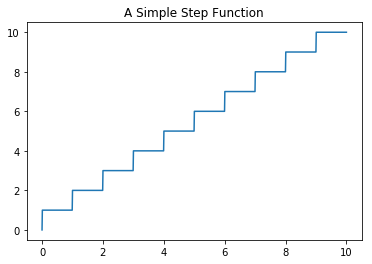

In [15]:
x = np.linspace(0, 10, 1000)
def step(x):
    return np.ceil(x)

plt.plot(x, step(x))
plt.title("A Simple Step Function")

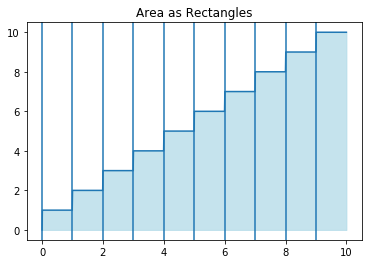

In [16]:
n = np.arange(0, 10, 1)
plt.plot(x, step(x))
plt.fill_between(x, step(x), alpha = 0.7, color = "lightblue")
plt.title("Area as Rectangles")

for xc in n:
    plt.axvline(x=xc)

### Connection to Summation

Now, we see that this comes down to finding the areas of 10 rectangles.  The forumla for the area of a rectangle is $A = l \times w$, so we have the area under the curve as:

$$\text{Area under step function} = 1\times(1) + 1\times(2) + 1\times(3) + ... 1\times(10)$$

$$1 + 2 + 3 + ... + 10$$

We recognize this sum from before.  We know how to compute this sum, and in fact, the sum for any number $n$!.  Hence, for $n = 10$, the area is:

$$\frac{10(11)}{2}$$

If we were asked for the area under the same curve but from $x = 4$ to $x = 20$, what would the area be?

### Different Heights of Rectangles

We can easily extend the problem to involve step functions whose inputs are as follows:

```python
def step2(x):
    return x**2
```

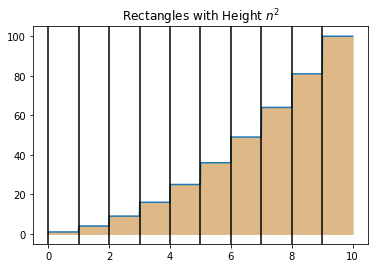

In [17]:
def step2(x):
    return np.ceil(x)**2

plt.plot(x, step2(x))
plt.fill_between(x, step2(x), color = "burlywood")
plt.title("Rectangles with Height $n^2$")

for xc in n:
    plt.axvline(x=xc, color = "black")

Again, we can use our knowledge about summations to determine the area under the curve here.  

$$\text{Area Under Step(10)}^2 = 1 \times 1^2 + 1 \times 2^2 + 1 \times 3^2 + ... + 1 \times 10^2$$

$$ = 1^2 + 2^2 + 3^2 + ... + 10^2$$

In [18]:
x, n = sy.symbols('x n')
sy.summation(x**2, (x, 1, 10))

385

In [19]:
sy.pprint(sy.summation(x**2, (x, 1, n)))

 3    2    
n    n    n
── + ── + ─
3    2    6


### Continuous Functions

We can use these patterns to approximate the area underneath other functions.  Both of the examples above could be used to approximate the area under the $f(x) = x$ and $g(x) = x^2$.  By superimposing these curves we can see the connection to approximating with rectangles.

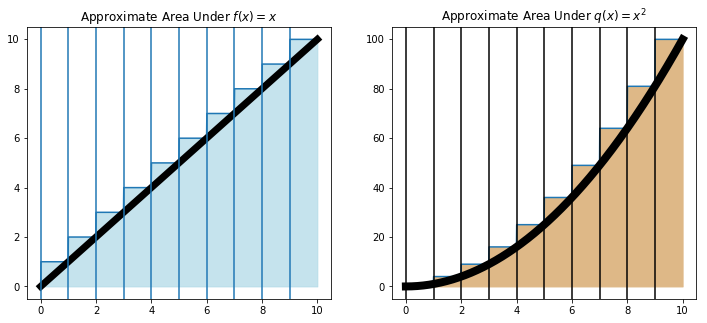

In [20]:
n = np.arange(0, 10, 1)
x = np.linspace(0, 10, 1000)


plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(x, step(x))
plt.plot(x, x, lw = 7, c = "black")
plt.fill_between(x, step(x), alpha = 0.7, color = "lightblue")
plt.title("Approximate Area Under $f(x) = x$")

for xc in n:
    plt.axvline(x=xc)

plt.subplot(122)
plt.plot(x, step2(x))
plt.plot(x, x**2, lw = 8, c = "black")
plt.fill_between(x, step2(x), color = "burlywood")
plt.title("Approximate Area Under $q(x) = x^2$")

for xc in n:
    plt.axvline(x=xc, color = "black")

Combining our above results with these images, we can say that 10 rectanges approximates the area from $x = 0$ to $x = 10$ for $f(x) = x$ as 55, and for $g(x)$ as 385.  We want to improve these approximations.

#### Improving the Approximations

We can get a better approximation in each of the above examples by using more rectangles. Let's begin by considering the case of the same functions and intervals, however now we want to use 20 rectangles.  First, let us determine the width of the rectangles.

Assuming the rectangles are the same width, we will have 20 rectangles over 10 spaces, so each will be 1/2 a unit wide in both cases.

Now, the height of the rectangles.  These are not all the same.  For $f(x) = x$, the first rectangle would be 1/2 tall.  The second would be 2/2, third 3/2, fourth 4/2, etc.

We can make lists for each of these using Python instead of writing them all out.  Let's use Pandas to make a table of the results, and look at the first five rows.  We do this with the `pd.DataFrame()` command that combines the list into the table that we name `df`.  Then, we display the top of the table with the `df.head()` command.



In [21]:
width = [0.5 for i in range(20)]
height = [(i+1)/2 for i in range(20)]

In [22]:
df = pd.DataFrame({"Width": width, "Height": height})

In [23]:
df.head()

,Width,Height
0,0.5,0.5
1,0.5,1.0
2,0.5,1.5
3,0.5,2.0
4,0.5,2.5


Now, we can compute the areas by multiplying each element together.  Below, we create a list of areas and add a column named "Areas" to the DataFrame.

In [24]:
areas = [(width[i]*height[i]) for i in range(20)]
df["Areas"] = areas
df.head()

,Width,Height,Areas
0,0.5,0.5,0.25
1,0.5,1.0,0.50
2,0.5,1.5,0.75
3,0.5,2.0,1.00
4,0.5,2.5,1.25


Similarly, we can sum our list to calculate the updated approximation. 

In [25]:
sum(areas)

52.5

Let's see what happens if we approximate this region with 40 rectangles.  

In [26]:
width = [10/40 for i in range(40)]
height = [(i+1)/4 for i in range(40)]

In [27]:
areas_40 = [(width[i] * height[i]) for i in range(40)]
sum(areas_40)

51.25

### More Complex Curves

Suppose we wanted to approximate the area under the curve $h(x) = (x-1)(x-4)(x-5)$ from $x = 0$ to $x = 5$ as shown below.  First we use 10, then 20, 40, 100, and 1,000,000 rectangles to approximate this and compare our answers, and consider the best way to find  areas using rectangles.

In [28]:
def h(x):
    return (x - 1)*(x - 4)*(x - 5)

Text(0.5, 1.0, 'Area Under the Curve $h(x) = (x-1)(x-4)(x-5)$')

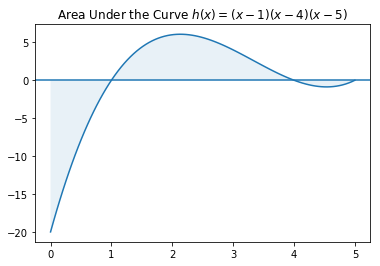

In [29]:
x = np.linspace(0, 5, 100)
plt.plot(x, h(x))
plt.fill_between(x, h(x), alpha = 0.1)
plt.axhline()
plt.title("Area Under the Curve $h(x) = (x-1)(x-4)(x-5)$")

#### 10 Rectangles

Over an interval of width 5, with 10 rectangles each would have width 1/2.  You should notice the general approach for the width of the rectangles by now as the length of the interval divided by the number of rectangles.  

Also, with a more complex curve like this example, we want to find an easy way to determine the heights of the rectangles.  The rectangles occur every 1/2 a unit.  The height of the first rectangle would be at f(1/2), the second at f(2/2), the third at f(3/2), ... up to f(9/2), f(10/2).  

There is a pattern to the heights.  Every one is an integer multiple of the width.  Hence, we have a loose definition for our approximation under the curve $h(x)$ on the interval [0, 5] as:

Area = width times height

Area = (5/10) times [f(i/2) for i = 1, 2, 3, ..., 10]

We can easily implement this logic with Python and our list structures.

In [30]:
width = [5/10 for i in range(10)]
height = [h(5/10*i) for i in range(10)]
area = [(width[i] * height[i]) for i in range(10)]
sum(area)

-3.4375

Text(0.5, 1.0, 'Approximating the Area under $h(x) = (x-1)(x-4)(x-5)$ with 10 Rectangles')

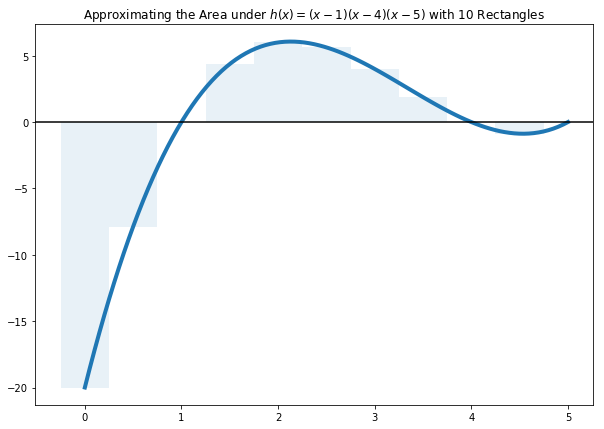

In [31]:
plt.figure(figsize = (10, 7))
n = np.arange(0, 5, .5)
plt.plot(x, h(x), linewidth = 4)
plt.axhline(color = 'black')
plt.bar(n, height, width = 0.5, alpha = 0.1)
plt.title("Approximating the Area under $h(x) = (x-1)(x-4)(x-5)$ with 10 Rectangles")

In [32]:
# twenty rectangles
width2 = [5/20 for i in range(20)]
height2 = [h(5/20*i) for i in range(20)]
area2 = [(width2[i] * height2[i]) for i in range(20)]
sum(area2)

-0.546875

In [33]:
# 40 rectangles
width3 = [5/40 for i in range(40)]
height3 = [h(5/40*i) for i in range(40)]
area3 = [(width3[i] * height3[i]) for i in range(40)]
sum(area3)

0.80078125

In [34]:
#100 rectangles
width4 = [5/100 for i in range(100)]
height4 = [h(5/100*i) for i in range(100)]
area4 = [(width4[i] * height4[i]) for i in range(100)]
sum(area4)

1.5781250000000033

In [35]:
# 100000 rectangles
width5 = [5/100000 for i in range(100000)]
height5 = [h(5/100000*i) for i in range(100000)]
area5 = [(width5[i] * height5[i]) for i in range(100000)]
sum(area5)

2.08283332812496


**IMPORTANT!**

$$\text{Area} = \int_a^b f(x) dx = \lim_{n \to \infty} \frac{b-a}{n} \sum_{i = 1}^n f(a + i*\text{width})$$

# Integration 

**The definite integral** 
Let $f$ be a function defined on $[a,b]$.  If $$\lim_{n \to x} [f(x_1)\Delta x+ f(x_2)\Delta x +... f(x_n)\Delta x]$$  exists and is the same for all choices representative points, $x_1, x_2,... x_n$ in the $n$ subintervals of $[a,b]$ of equal width $\delta x = (b-a)/n$ then this limit is called the **definite integral** of $f$ from $a$ to $b$ and is denoted by $\int_a^b f(x) dx$.  Thus 

$$\int_a^b f(x) dx = \lim_{n \to \infty} [f(x_1)\Delta x+ f(x_2)\Delta x +... f(x_n)\Delta x]$$



We will get to how to do this later by hand, talk about the antiderivative, and how to get there later, but for now the function below will help us numberically integrate (basically with a lot of rectangles!) and will print for us that the area under the curve is "whatever it is", then we can use the answer to interpret the answer in context of our problem.  

**note: you do note need to change any of my commands in here for integrate**.  Just use the function I created and input f, a, b n= into integrate. 

**The plot title is sorry this took so long because sometimes it will**


In [60]:
def integrate(f, a, b, n=10000000):
    x = np.linspace(a, b, n)
    width = (b-a)/n 
    heights = [f(a)]
    for i in range(n):
        next = f(i*width)
        heights.append(next)
    areas = [i*width for i in heights]
    total_area = sum(areas)
    print('The area under the curve \nis equal to', round(total_area, 2))
    plt.plot(x, f(x))
    plt.fill_between(x, f(x), alpha = 0.3, color = 'blue', hatch = '|')
    plt.title('Sorry this took so Long!')

Let's try now with our own function: $f(x)=x^3+4x^2+3x-1$ on $[-10,10]$



The area under the curve 
is equal to 51245.57


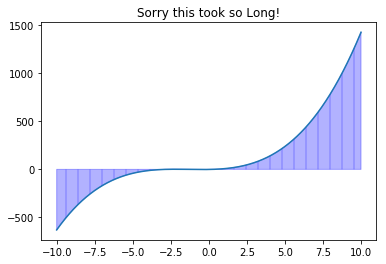

In [37]:
def f(x): return x**3+4*x**2+3*x-1
integrate(f, -10,10, n=100000)

Let's try  $g(x)= \frac{3x}{3x^2-1}$ from [1,50]

In [38]:
def g(x): return (3*x)/(3*x**2-1)


The area under the curve 
is equal to 3.02


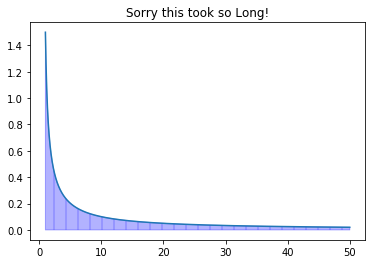

In [39]:
integrate(g,1,50,n=100000)

Let's look back at that varying deposits example from the beginning of the lab.  We fit curve $s$ to it and now let's see what the area under that curve (thus our savings) would be.

The area under the curve 
is equal to 1020.21


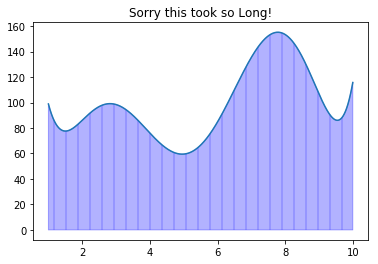

In [61]:
integrate(s, 1, 10, n=100000)

# Let's Try with Some Applications 

Marginal Revenue

The management of WCT Industries has determined that the daily marginal revenue function associated with selling $x$ units of their new boat covers is gien by $$R'(x)=-0.1x+40$$ where $R'(x)$ is measured in dollars per unit.  

Find the daily total revenue realized from the sale of 200 units.  

Find the additional revenue realized when the production and then sales increased from 200 to 300 units.  




# For You To Do!


# Name: 

# 1. 

1a. Consider the function $f(x) = 10-x^2$ on the interval $[0,5]$.  Plot the curve and approximate the area using 10 rectangles, 100 rectangles, and 100000 rectangles.  




In [86]:
def f(x): return 10-x**2


In [87]:
width = [5/10 for i in range(10)]
height = [f(5/10*i) for i in range(10)]
area = [(width[i] * height[i]) for i in range(10)]
sum(area)

14.375

Text(0.5, 1.0, 'Approximating the Area under $f(x)$ with 10 Rectangles')

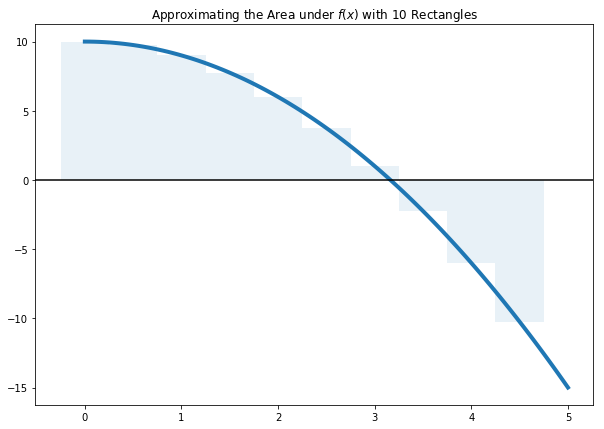

In [88]:
plt.figure(figsize = (10, 7))
n = np.arange(0, 5, .5)
x=np.linspace(0,5,100)
plt.plot(x, f(x), linewidth = 4)
plt.axhline(color = 'black')
plt.bar(n, height, width = 0.5, alpha = 0.1)
plt.title("Approximating the Area under $f(x)$ with 10 Rectangles")

1b. Consider the function $f(x) = \frac{1}{\sqrt{x}}$ on the interval $[0.1, 10]$.  Plot the function, and use our methods from above to approximate the area under the curve using 4 rectangles, 10 rectangles, then 1000 rectangles.

In [89]:
def g(x): return 1/(x**(.5))

In [90]:
width = [(10-0.1)/10 for i in range(10)]
height = [g((10-0.1)/10*i) for i in range(10)]
area = [(width[i] * height[i]) for i in range(10)]
sum(area)

ZeroDivisionError: float division by zero

# 2.  
Using commands from earlier in this lab.  Approximate the area under the given curve over the given interval. 


2a.  $f(x)=x^2+4x+-1$ from $[-5,5]$

In [91]:
def f(x): return x**2+4*x-1

The area under the curve 
is equal to 523.33


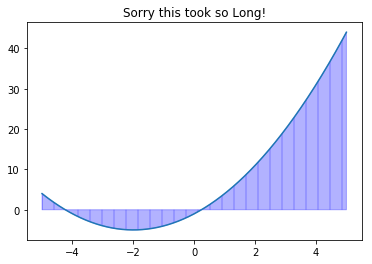

In [96]:
integrate(f,-5,5,n=1000000)

2b. $g(x)= e^x$ from $[0,3]$

In [93]:
def g(x): return np.exp(x)


The area under the curve 
is equal to 19.09


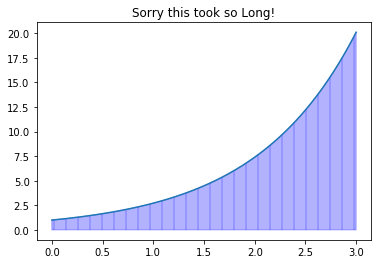

In [94]:
integrate(g,0,3,n=1000000)

# 3. 
As the twentieth century ended, Clark County Nevada (mostly Las Vegas) was one of the fastest growing metropolitan areas in the United STates.  From 1970 - 2000 the population grew at a rate of $$R(x)=133680x^2-178788x+234633$$ $$(0\geq x\geq 3$$ Where $x=0$ corresponds to the beginning of 1970. 


What was the net change in population over the decade 1980 to 1990?  

What about 1970-1990?  What about 1990-1995?

**Write a sentence explaining each one.**


In [104]:
def R(x): return 133680*x**2-178788*x+234633

 


The area under the curve 
is equal to 189801.12


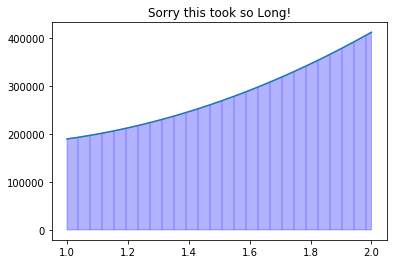

In [105]:
integrate(R,1,2,n=100000)

The area under the curve 
is equal to 468172.92


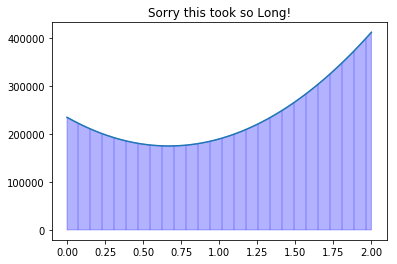

In [106]:
integrate(R,0,2,n=100000)

The area under the curve 
is equal to 100540.2


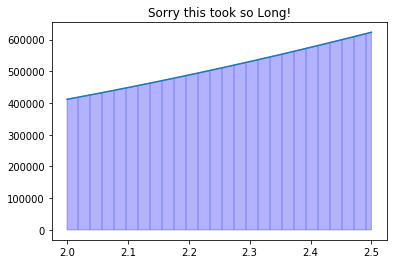

In [107]:
integrate(R,2,2.5,n=100000)

# 4. 
An efficiency study conducted for Elektra Electronics showed that the rate at which Space Commander walkie-talkies were assembled by the average worker $x$ hours after starting work at 8am is given by 
$$g(x)=-3t^2+12x+15$$ for $(0\leq x\leq4)$

Determine how many walkie-talkies can be assembled by the average worker in the first hour of the morning shift. 

In [108]:
def g(x): return -3*x**2+12*x+15

The area under the curve 
is equal to 20.0


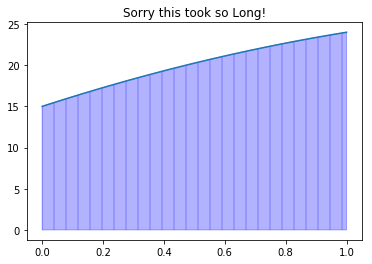

In [109]:
integrate(g,0,1,n=100000)

The area under the curve 
is equal to 20.0


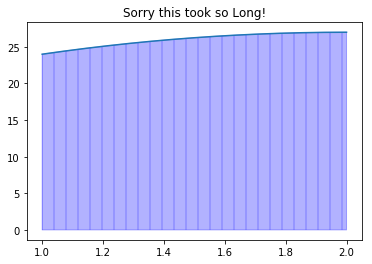

In [110]:
integrate(g,1,2, n=100000)

The area under the curve 
is equal to 92.0


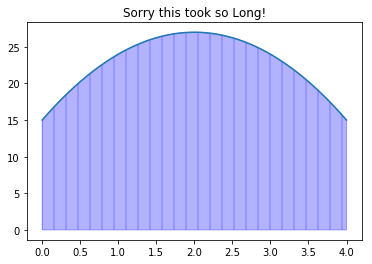

In [115]:
integrate(g,0,4, n=10000000)

The area under the curve 
is equal to 20.0


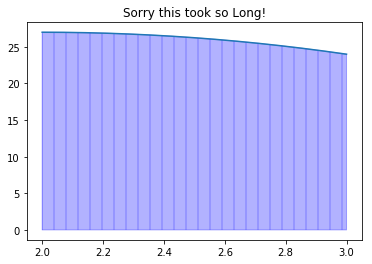

In [113]:
integrate(g,2,3,n=100000)

In [ ]:
integrate(g,3,4,n=100000)

The area under the curve 
is equal to 92.0


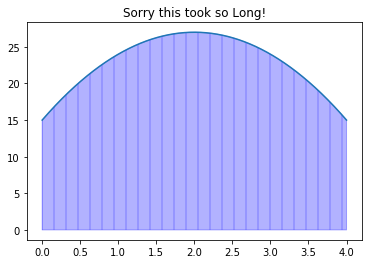

In [114]:
integrate(g,0,4, n=100000)

# 5. 
The annual sales (in millions of units) of one brand of netbook computers was expected to grow from 2008 to 2014 in accordance with the following function $$f(x)=0.18x^2+0.16x+2.64$$ per year, where x is measured in years and x=0 corresponding to 2008.   According to this model, how many netbook computers were sold over the next 6 years. 
**After finding it, explain your answer in a sentence**

In [116]:
def f(x): return 0.18*x**2+0.16*x+2.64

The area under the curve 
is equal to 31.68


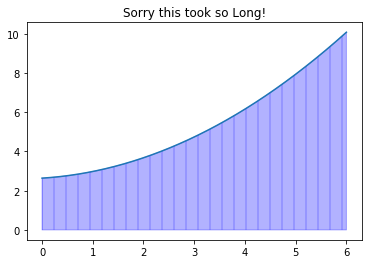

In [117]:
integrate(f,0,6,n=100000)

In [118]:
def p(x): return 18-3*np.exp(-2*x)-6*np.exp(-x/3)

The area under the curve 
is equal to 73.9


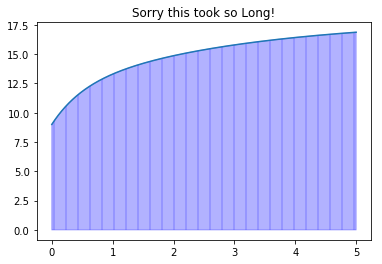

In [119]:
integrate(p,0,5,n=100000)

In [120]:
(1/(5-0))*73.9

14.780000000000001

# Think about what you learned today and write about it! 
Write a short paragraph about what you learned in this notebook.  This needs to be a thoughtful, reflective paragraph.  There should be reflection on the mathematics content you learned.  
You may want to review the goals of this notebook (at the top).
***IF I DO NOT SEE A REFLECTION ON MATHEMATICS CONTENT AND WHAT YOU LEARNED ABOUT THAT YOU WILL LOSE 3 POINTS AUTOMATICALLY***  Stating "I did the integral" is not a reflection on math content

# Please submit the .ipynb file on Blackboard and please print (and bring with you to class) the portion from "For You to Do" to the end and then do print preview, save as pdf. 
Please make sure you are submitting the correct type of file (.ipynb) and that it is named correctly or points will be deducted. 